# ReadME


Make sure you have all the required libraries installed in your environment.

Since, we are using Selenium for Data Scarping, make sure you have the proper webdriver installed in your system.

Depending on the version of the Chrome brower, download the respective selenium driver.
Link for the Webdriver- https://chromedriver.chromium.org/downloads

While using the actual code you need to specify the file location of the webdriver. 
If you fail to do so, then the code will not be able to launch a session fo chrome for webscraping.

You also need to enter your Twitter Login ID, Password and a Subject/Topic.

Upon doing so, the code will enter your credentials automatically in the session created and then will start searching for tweets related to the Subject you entered.

After the code is done scraping, code will automatically create and open the Excel file(You can change the name as per your wish).

Once you execute the next section of code, you will be able to clean the data for implementing the Vader Algorithm.

While cleaning the data, you can mention the tags that you want to clean from the dataset. 

After applying the Vader Algorithm, the code will create a new CSV file which will contain the Original Tweet, Cleaned_Tweet along with the Sentiment found using Vader Algorithm. 

In [1]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3]:
from  vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [101]:
sid= SentimentIntensityAnalyzer()

In [16]:
import csv 
import re
import matplotlib.pyplot as plt 
from getpass import getpass
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
import pandas as pd 
from selenium.common.exceptions import NoSuchElementException


# Apple 

In [191]:
driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')
driver.get("https://www.twitter.com/login")
subject = "#applestock"


usernm= input("\n Enter Username:")
passw= getpass('Enter Password:')


# Setup the log in
sleep(3)
username = driver.find_element("xpath",".//input[@name='text']")
username.send_keys(usernm)
next_button = driver.find_element("xpath",".//span[contains(text(),'Next')]")
next_button.click()
###
sleep(3)
password = driver.find_element("xpath",".//input[@name='password']")
password.send_keys(passw)
log_in = driver.find_element("xpath",".//span[contains(text(),'Log in')]")
log_in.click()

# Search item and fetch it
sleep(3)
search_box = driver.find_element("xpath",".//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(subject)
search_box.send_keys(Keys.ENTER)

sleep(3)
top = driver.find_element("xpath",".//span[contains(text(),'Top')]")
top.click()

#sleep(3)
#profile = driver.find_element("xpath",".//*[@id='react-root']/div/div/div[2]/main/div/div/div/div/div/div[2]/div/section/div/div/div[1]/div/div/div/div/div[2]/div/div[1]/div/div[1]/a/div/div[1]/span/span")
#profile.click()



# UserTag = driver.find_element(By.XPATH,"//div[@data-testid='User-Names']").text
# TimeStamp = driver.find_element(By.XPATH,"//time").get_attribute('datetime')
# Tweet = driver.find_element(By.XPATH,"//div[@data-testid='tweetText']").text
# Reply = driver.find_element(By.XPATH,"//div[@data-testid='reply']").text
# reTweet = driver.find_element(By.XPATH,"//div[@data-testid='retweet']").text
# Like = driver.find_element(By.XPATH,"//div[@data-testid='like']").text


UserTags=[]
TimeStamps=[]
Tweets=[]
Replys=[]
reTweets=[]
Likes=[]

articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
while True:
    for article in articles:
        UserTag = driver.find_element("xpath",".//div[@data-testid='User-Names']").text
        UserTags.append(UserTag)
        
        TimeStamp = driver.find_element("xpath",".//time").get_attribute('datetime')
        TimeStamps.append(TimeStamp)
        
        Tweet = driver.find_element("xpath",".//div[@data-testid='tweetText']").text
        Tweets.append(Tweet)
        
        Reply = driver.find_element("xpath",".//div[@data-testid='reply']").text
        Replys.append(Reply)
        
        reTweet = driver.find_element("xpath",".//div[@data-testid='retweet']").text
        reTweets.append(reTweet)
        
        Like = driver.find_element("xpath",".//div[@data-testid='like']").text
        Likes.append(Like)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
    Tweets2 = list(set(Tweets))
    if len(Tweets2) > 6:
        break


print(len(UserTags),
len(TimeStamps),
len(Tweets),
len(Replys),
len(reTweets),
len(Likes))


import pandas as pd

df = pd.DataFrame(zip(UserTags,TimeStamps,Tweets,Replys,reTweets,Likes)
                  ,columns=['UserTags','TimeStamps','Tweets','Replys','reTweets','Likes'])

df.head()

df.to_excel(r"D:\Text Files\Apple.xlsx",index=False)

import os
os.system('start "excel" "D:\Text Files\Apple.xlsx"')


C:\Users\Haritasa\AppData\Local\Temp\ipykernel_8796\2510506018.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')



 Enter Username:bhanu_cheitanya
Enter Password:········
55 55 55 55 55 55


0

In [192]:
#Data Cleaning
dat= pd.read_excel(r'D:\Text Files\Apple.xlsx')
dat

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes
0,"StockDweebs\n@StockDweebs\n·\nApr 21, 2021",2021-04-21T10:21:24.000Z,$AAPL #Applestock #AppleEvent\n\nThe time to b...,19.0,14.0,300
1,"StockDweebs\n@StockDweebs\n·\nApr 21, 2021",2021-04-21T10:21:24.000Z,$AAPL #Applestock #AppleEvent\n\nThe time to b...,19.0,14.0,300
2,"StockDweebs\n@StockDweebs\n·\nApr 21, 2021",2021-04-21T10:21:24.000Z,$AAPL #Applestock #AppleEvent\n\nThe time to b...,19.0,14.0,300
3,"StockDweebs\n@StockDweebs\n·\nApr 21, 2021",2021-04-21T10:21:24.000Z,$AAPL #Applestock #AppleEvent\n\nThe time to b...,19.0,14.0,300
4,"OM Trading\n@TradingWithOM\n·\nJul 17, 2020",2020-07-16T23:59:06.000Z,#MVIS told you guys. This stock was bound to b...,NaN,NaN,3
5,"OM Trading\n@TradingWithOM\n·\nJul 17, 2020",2020-07-16T23:59:06.000Z,#MVIS told you guys. This stock was bound to b...,NaN,NaN,3
6,"OM Trading\n@TradingWithOM\n·\nJul 17, 2020",2020-07-16T23:59:06.000Z,#MVIS told you guys. This stock was bound to b...,NaN,NaN,3
7,"OM Trading\n@TradingWithOM\n·\nJul 17, 2020",2020-07-16T23:59:06.000Z,#MVIS told you guys. This stock was bound to b...,NaN,NaN,3
8,"OM Trading\n@TradingWithOM\n·\nJul 17, 2020",2020-07-16T23:59:06.000Z,#MVIS told you guys. This stock was bound to b...,NaN,NaN,3
9,"OM Trading\n@TradingWithOM\n·\nJul 17, 2020",2020-07-16T23:59:06.000Z,#MVIS told you guys. This stock was bound to b...,NaN,NaN,3


In [193]:
df= pd.DataFrame(dat)

In [196]:
df['Replys']=df['Replys'].astype(int)

In [195]:
df['Replys'] = df['Replys'].fillna(0)

In [197]:
df=df.drop_duplicates()

In [198]:
df2= pd.DataFrame(df['Tweets'])
df2

,Tweets
0,$AAPL #Applestock #AppleEvent\n\nThe time to b...
4,#MVIS told you guys. This stock was bound to b...
11,Are you looking for any type of #logodesign?\n...
24,"Watch $AAPL The coming days, it will be breach..."
36,#Apple CEO #TimCook sold the majority of the f...
44,"Apple, Amazon, Netflix, Microsoft shares beat ..."
50,#Apple to split shares as prices near $400; in...


In [199]:
#Function to clean the tweets
def CleanTwt(twt):
    twt= re.sub('#apple','apple',twt)            #Removes "#" from apple
    twt= re.sub('#Apple','Apple',twt)            #Removes "#" from Apple
    twt= re.sub('#applestock','applestock',twt)  #Removes "#" from applestock
    twt= re.sub('#AppleStock','AppleStock',twt)  #Removes "#" from AppleStock
    twt= re.sub('#[A-Za-z0-9]+','',twt)          #Removes String with "#"
    twt=re.sub('\\n','',twt)                     #Removes the '\n' String
    twt=re.sub('https?:\/\/S+','',twt)           #Removes any hyperlink
    return twt

In [200]:
#Clean the tweets
df2['Cleaned_Tweets']= df2['Tweets'].apply(CleanTwt)
df2

,Tweets,Cleaned_Tweets
0,$AAPL #Applestock #AppleEvent\n\nThe time to b...,$AAPL Applestock AppleEventThe time to buy App...
4,#MVIS told you guys. This stock was bound to b...,told you guys. This stock was bound to break ...
11,Are you looking for any type of #logodesign?\n...,Are you looking for any type of ?@ORDER HERE: ...
24,"Watch $AAPL The coming days, it will be breach...","Watch $AAPL The coming days, it will be breach..."
36,#Apple CEO #TimCook sold the majority of the f...,Apple CEO sold the majority of the five milli...
44,"Apple, Amazon, Netflix, Microsoft shares beat ...","Apple, Amazon, Netflix, Microsoft shares beat ..."
50,#Apple to split shares as prices near $400; in...,Apple to split shares as prices near $400; inv...


In [201]:
#Function to find polarity scores.
def sentiment_Vader(text):
    over_all_polarity= sid.polarity_scores(text)
    if over_all_polarity['compound']>= 0.85:
        return "positive"
    elif over_all_polarity['compound']<= -0.05:
        return "negative"
    else:
        return "neutral"


In [202]:
#Applying Vader Algorithm to the 'Cleaned_Tweets' column. 
df2['Vader_Senti']= df2['Cleaned_Tweets'].apply(lambda x: sentiment_Vader(x))

In [203]:
df2

,Tweets,Cleaned_Tweets,Vader_Senti
0,$AAPL #Applestock #AppleEvent\n\nThe time to b...,$AAPL Applestock AppleEventThe time to buy App...,neutral
4,#MVIS told you guys. This stock was bound to b...,told you guys. This stock was bound to break ...,neutral
11,Are you looking for any type of #logodesign?\n...,Are you looking for any type of ?@ORDER HERE: ...,neutral
24,"Watch $AAPL The coming days, it will be breach...","Watch $AAPL The coming days, it will be breach...",neutral
36,#Apple CEO #TimCook sold the majority of the f...,Apple CEO sold the majority of the five milli...,neutral
44,"Apple, Amazon, Netflix, Microsoft shares beat ...","Apple, Amazon, Netflix, Microsoft shares beat ...",neutral
50,#Apple to split shares as prices near $400; in...,Apple to split shares as prices near $400; inv...,neutral


In [204]:
#Write file
csv_data= df2.to_csv(r'D:\Text Files\AppleVader.csv')

# Microsoft

In [105]:
driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')
driver.get("https://www.twitter.com/login")

C:\Users\Haritasa\AppData\Local\Temp\ipykernel_8796\2762140619.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')


In [106]:
subject = "#microsoftstock"


usernm= input("\n Enter Username:")
passw= getpass('Enter Password:')

# Setup the log in
sleep(3)
username = driver.find_element("xpath",".//input[@name='text']")
username.send_keys(usernm)
next_button = driver.find_element("xpath",".//span[contains(text(),'Next')]")
next_button.click()
###
sleep(3)
password = driver.find_element("xpath",".//input[@name='password']")
password.send_keys(passw)
log_in = driver.find_element("xpath",".//span[contains(text(),'Log in')]")
log_in.click()

# Search item and fetch it
sleep(3)
search_box = driver.find_element("xpath",".//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(subject)
search_box.send_keys(Keys.ENTER)

sleep(3)
top = driver.find_element("xpath",".//span[contains(text(),'Top')]")
top.click()

#sleep(3)
#profile = driver.find_element("xpath",".//*[@id='react-root']/div/div/div[2]/main/div/div/div/div/div/div[2]/div/section/div/div/div[1]/div/div/div/div/div[2]/div/div[1]/div/div[1]/a/div/div[1]/span/span")
#profile.click()



# UserTag = driver.find_element(By.XPATH,"//div[@data-testid='User-Names']").text
# TimeStamp = driver.find_element(By.XPATH,"//time").get_attribute('datetime')
# Tweet = driver.find_element(By.XPATH,"//div[@data-testid='tweetText']").text
# Reply = driver.find_element(By.XPATH,"//div[@data-testid='reply']").text
# reTweet = driver.find_element(By.XPATH,"//div[@data-testid='retweet']").text
# Like = driver.find_element(By.XPATH,"//div[@data-testid='like']").text


UserTags=[]
TimeStamps=[]
Tweets=[]
Replys=[]
reTweets=[]
Likes=[]

articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
while True:
    for article in articles:
        UserTag = driver.find_element("xpath",".//div[@data-testid='User-Names']").text
        UserTags.append(UserTag)
        
        TimeStamp = driver.find_element("xpath",".//time").get_attribute('datetime')
        TimeStamps.append(TimeStamp)
        
        Tweet = driver.find_element("xpath",".//div[@data-testid='tweetText']").text
        Tweets.append(Tweet)
        
        Reply = driver.find_element("xpath",".//div[@data-testid='reply']").text
        Replys.append(Reply)
        
        reTweet = driver.find_element("xpath",".//div[@data-testid='retweet']").text
        reTweets.append(reTweet)
        
        Like = driver.find_element("xpath",".//div[@data-testid='like']").text
        Likes.append(Like)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
    Tweets2 = list(set(Tweets))
    if len(Tweets2) > 6:
        break


print(len(UserTags),
len(TimeStamps),
len(Tweets),
len(Replys),
len(reTweets),
len(Likes))


import pandas as pd

df = pd.DataFrame(zip(UserTags,TimeStamps,Tweets,Replys,reTweets,Likes)
                  ,columns=['UserTags','TimeStamps','Tweets','Replys','reTweets','Likes'])

df.head()

df.to_excel(r"D:\Text Files\Microsoft.xlsx",index=False)

import os
os.system('start "excel" "D:\Text Files\Microsoft.xlsx"')


185 185 185 185 185 185


0

In [107]:
#Data Cleaning
dat= pd.read_excel(r'D:\Text Files\Microsoft.xlsx')
dat

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes
0,Paul Bratby Official\n@PBratbyOfficial\n·\nMay 10,2022-05-10T13:01:35.000Z,$MSFT Stock Technical Analysis with #ElliottWa...,NaN,1.0,3.0
1,Paul Bratby Official\n@PBratbyOfficial\n·\nMay 10,2022-05-10T13:01:35.000Z,$MSFT Stock Technical Analysis with #ElliottWa...,NaN,1.0,3.0
2,Paul Bratby Official\n@PBratbyOfficial\n·\nMay 10,2022-05-10T13:01:35.000Z,$MSFT Stock Technical Analysis with #ElliottWa...,NaN,1.0,3.0
3,Paul Bratby Official\n@PBratbyOfficial\n·\nMay 10,2022-05-10T13:01:35.000Z,$MSFT Stock Technical Analysis with #ElliottWa...,NaN,1.0,3.0
4,"TheCountryCaller\n@TheCountryCallr\n·\nJun 30,...",2016-06-30T13:00:50.000Z,Street Analysts Are Bullish On #MicrosoftStock...,NaN,NaN,NaN
...,...,...,...,...,...,...
180,AAATrade\n@AAATrade\n·\nMar 21,2022-03-21T11:04:00.000Z,The shares of Microsoft Corporation have recei...,NaN,NaN,NaN
181,AAATrade\n@AAATrade\n·\nMar 21,2022-03-21T11:04:00.000Z,The shares of Microsoft Corporation have recei...,NaN,NaN,NaN
182,AAATrade\n@AAATrade\n·\nMar 21,2022-03-21T11:04:00.000Z,The shares of Microsoft Corporation have recei...,NaN,NaN,NaN
183,AAATrade\n@AAATrade\n·\nMar 21,2022-03-21T11:04:00.000Z,The shares of Microsoft Corporation have recei...,NaN,NaN,NaN


In [109]:
df= pd.DataFrame(dat)
df['Replys'] = df['Replys'].fillna(0)
df=df.drop_duplicates()
df2= pd.DataFrame(df['Tweets'])
df2

,Tweets
0,$MSFT Stock Technical Analysis with #ElliottWa...
4,Street Analysts Are Bullish On #MicrosoftStock...
13,The Best Strategy for Protecting Your #Investm...
31,#Microsoft Stock Live Chart\nhttp://ifcmarkets...
46,#Microsoft wraps up its best year since 2009 #...
54,Apple and #Microsoft contributed the most to t...
178,The shares of Microsoft Corporation have recei...


In [110]:
#Function to clean the tweets
def CleanTwt(twt):
    twt= re.sub('#microsoft','microsoft',twt)            #Removes "#" from microsoft
    twt= re.sub('#Microsoft','Microsoft',twt)            #Removes "#" from Microsoft
    twt= re.sub('#[A-Za-z0-9]+','',twt)          #Removes String with "#"
    twt=re.sub('\\n','',twt)                     #Removes the '\n' String
    twt=re.sub('https?:\/\/S+','',twt)           #Removes any hyperlink
    return twt

In [111]:
#Clean the tweets
df2['Cleaned_Tweets']= df2['Tweets'].apply(CleanTwt)
df2

,Tweets,Cleaned_Tweets
0,$MSFT Stock Technical Analysis with #ElliottWa...,$MSFT Stock Technical Analysis with Watch Vi...
4,Street Analysts Are Bullish On #MicrosoftStock...,Street Analysts Are Bullish On - http://goo.g...
13,The Best Strategy for Protecting Your #Investm...,The Best Strategy for Protecting Your in $MSF...
31,#Microsoft Stock Live Chart\nhttp://ifcmarkets...,Stock Live Charthttp://ifcmarkets.com/en/mark...
46,#Microsoft wraps up its best year since 2009 #...,wraps up its best year since 2009 https:/...
54,Apple and #Microsoft contributed the most to t...,Apple and contributed the most to the market'...
178,The shares of Microsoft Corporation have recei...,The shares of Microsoft Corporation have recei...


In [118]:
#Function to find polarity scores.
def sentiment_Vader(text):
    over_all_polarity= sid.polarity_scores(text)
    if over_all_polarity['compound']>= 0.85:
        return "positive"
    elif over_all_polarity['compound']<= -0.05:
        return "negative"
    else:
        return "neutral"


In [119]:
#Applying Vader Algorithm to the 'Cleaned_Tweets' column. 
df2['Vader_Senti']= df2['Cleaned_Tweets'].apply(lambda x: sentiment_Vader(x))
df2

,Tweets,Cleaned_Tweets,Vader_Senti
0,$MSFT Stock Technical Analysis with #ElliottWa...,$MSFT Stock Technical Analysis with Watch Vi...,neutral
4,Street Analysts Are Bullish On #MicrosoftStock...,Street Analysts Are Bullish On - http://goo.g...,neutral
13,The Best Strategy for Protecting Your #Investm...,The Best Strategy for Protecting Your in $MSF...,neutral
31,#Microsoft Stock Live Chart\nhttp://ifcmarkets...,Stock Live Charthttp://ifcmarkets.com/en/mark...,neutral
46,#Microsoft wraps up its best year since 2009 #...,wraps up its best year since 2009 https:/...,neutral
54,Apple and #Microsoft contributed the most to t...,Apple and contributed the most to the market'...,negative
178,The shares of Microsoft Corporation have recei...,The shares of Microsoft Corporation have recei...,neutral


In [120]:
#Write file
csv_data= df2.to_csv(r'D:\Text Files\MicrosoftVader.csv')

# Tesla

In [138]:
driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')
driver.get("https://www.twitter.com/login")

subject = "#teslastock"


usernm= input("\n Enter Username:")
passw= getpass('Enter Password:')

# Setup the log in
sleep(3)
username = driver.find_element("xpath",".//input[@name='text']")
username.send_keys(usernm)
next_button = driver.find_element("xpath",".//span[contains(text(),'Next')]")
next_button.click()
###
sleep(3)
password = driver.find_element("xpath",".//input[@name='password']")
password.send_keys(passw)
log_in = driver.find_element("xpath",".//span[contains(text(),'Log in')]")
log_in.click()

# Search item and fetch it
sleep(3)
search_box = driver.find_element("xpath",".//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(subject)
search_box.send_keys(Keys.ENTER)

sleep(3)
top = driver.find_element("xpath",".//span[contains(text(),'Top')]")
top.click()

#sleep(3)
#profile = driver.find_element("xpath",".//*[@id='react-root']/div/div/div[2]/main/div/div/div/div/div/div[2]/div/section/div/div/div[1]/div/div/div/div/div[2]/div/div[1]/div/div[1]/a/div/div[1]/span/span")
#profile.click()



# UserTag = driver.find_element(By.XPATH,"//div[@data-testid='User-Names']").text
# TimeStamp = driver.find_element(By.XPATH,"//time").get_attribute('datetime')
# Tweet = driver.find_element(By.XPATH,"//div[@data-testid='tweetText']").text
# Reply = driver.find_element(By.XPATH,"//div[@data-testid='reply']").text
# reTweet = driver.find_element(By.XPATH,"//div[@data-testid='retweet']").text
# Like = driver.find_element(By.XPATH,"//div[@data-testid='like']").text


UserTags=[]
TimeStamps=[]
Tweets=[]
Replys=[]
reTweets=[]
Likes=[]

articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
while True:
    for article in articles:
        UserTag = driver.find_element("xpath",".//div[@data-testid='User-Names']").text
        UserTags.append(UserTag)
        
        TimeStamp = driver.find_element("xpath",".//time").get_attribute('datetime')
        TimeStamps.append(TimeStamp)
        
        Tweet = driver.find_element("xpath",".//div[@data-testid='tweetText']").text
        Tweets.append(Tweet)
        
        Reply = driver.find_element("xpath",".//div[@data-testid='reply']").text
        Replys.append(Reply)
        
        reTweet = driver.find_element("xpath",".//div[@data-testid='retweet']").text
        reTweets.append(reTweet)
        
        Like = driver.find_element("xpath",".//div[@data-testid='like']").text
        Likes.append(Like)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
    Tweets2 = list(set(Tweets))
    if len(Tweets2) > 6:
        break


print(len(UserTags),
len(TimeStamps),
len(Tweets),
len(Replys),
len(reTweets),
len(Likes))


import pandas as pd

df = pd.DataFrame(zip(UserTags,TimeStamps,Tweets,Replys,reTweets,Likes)
                  ,columns=['UserTags','TimeStamps','Tweets','Replys','reTweets','Likes'])

df.head()

df.to_excel(r"D:\Text Files\Tesla.xlsx",index=False)

import os
os.system('start "excel" "D:\Text Files\Tesla.xlsx"')


C:\Users\Haritasa\AppData\Local\Temp\ipykernel_8796\902860124.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')


76 76 76 76 76 76


0

In [139]:
#Data Cleaning
dat= pd.read_excel(r'D:\Text Files\Tesla.xlsx')
dat
df= pd.DataFrame(dat)
df['Replys'] = df['Replys'].fillna(0)
df=df.drop_duplicates()
df2= pd.DataFrame(df['Tweets'])
df2

,Tweets
0,https://youtu.be/PxkSkH3A7T4 - Jim Cramer Gets...
4,Tesla CEO #ElonMusk has sold about 7.92 millio...
12,$TSLA vibes heading into the 3:1 split approva...
44,So what do you want in life? \n\nA Tesla conve...
51,Here comes the $TSLA 20 for 1 split!\n\nStay t...
60,મસ્ક ટ્વિટર ખરીદવા માટે ટેસ્લાના $સાત અબજના શે...
69,A finals d'any s'anunciarà la localització de ...


In [140]:
#Function to clean the tweets
def CleanTwt(twt):
    twt= re.sub('#Tesla','Tesla',twt)            #Removes "#" from tesla
    twt= re.sub('#tesla','tesla',twt)            #Removes "#" from Tesla
    twt= re.sub('#[A-Za-z0-9]+','',twt)          #Removes String with "#"
    twt=re.sub('\\n','',twt)                     #Removes the '\n' String
    twt=re.sub('https?:\/\/S+','',twt)           #Removes any hyperlink
    return twt


In [141]:
#Clean the tweets
df2['Cleaned_Tweets']= df2['Tweets'].apply(CleanTwt)
df2


,Tweets,Cleaned_Tweets
0,https://youtu.be/PxkSkH3A7T4 - Jim Cramer Gets...,https://youtu.be/PxkSkH3A7T4 - Jim Cramer Gets...
4,Tesla CEO #ElonMusk has sold about 7.92 millio...,Tesla CEO has sold about 7.92 million shares...
12,$TSLA vibes heading into the 3:1 split approva...,$TSLA vibes heading into the 3:1 split approva...
44,So what do you want in life? \n\nA Tesla conve...,So what do you want in life? A Tesla convertib...
51,Here comes the $TSLA 20 for 1 split!\n\nStay t...,Here comes the $TSLA 20 for 1 split!Stay tuned...
60,મસ્ક ટ્વિટર ખરીદવા માટે ટેસ્લાના $સાત અબજના શે...,મસ્ક ટ્વિટર ખરીદવા માટે ટેસ્લાના $સાત અબજના શે...
69,A finals d'any s'anunciarà la localització de ...,A finals d'any s'anunciarà la localització de ...


In [142]:
#Function to find polarity scores.
def sentiment_Vader(text):
    over_all_polarity= sid.polarity_scores(text)
    if over_all_polarity['compound']>= 0.85:
        return "positive"
    elif over_all_polarity['compound']<= -0.05:
        return "negative"
    else:
        return "neutral"


In [143]:

#Applying Vader Algorithm to the 'Cleaned_Tweets' column. 
df2['Vader_Senti']= df2['Cleaned_Tweets'].apply(lambda x: sentiment_Vader(x))
df2

#Write file
csv_data= df2.to_csv(r'D:\Text Files\TeslaVader.csv')

# Amazon 

In [132]:
driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')
driver.get("https://www.twitter.com/login")

subject = "#amazonstock"

usernm= input("\n Enter Username:")
passw= getpass('Enter Password:')


# Setup the log in
sleep(3)
username = driver.find_element("xpath",".//input[@name='text']")
username.send_keys(usernm)
next_button = driver.find_element("xpath",".//span[contains(text(),'Next')]")
next_button.click()
###
sleep(3)
password = driver.find_element("xpath",".//input[@name='password']")
password.send_keys(passw)
log_in = driver.find_element("xpath",".//span[contains(text(),'Log in')]")
log_in.click()

# Search item and fetch it
sleep(3)
search_box = driver.find_element("xpath",".//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(subject)
search_box.send_keys(Keys.ENTER)

sleep(3)
top = driver.find_element("xpath",".//span[contains(text(),'Top')]")
top.click()

#sleep(3)
#profile = driver.find_element("xpath",".//*[@id='react-root']/div/div/div[2]/main/div/div/div/div/div/div[2]/div/section/div/div/div[1]/div/div/div/div/div[2]/div/div[1]/div/div[1]/a/div/div[1]/span/span")
#profile.click()



# UserTag = driver.find_element(By.XPATH,"//div[@data-testid='User-Names']").text
# TimeStamp = driver.find_element(By.XPATH,"//time").get_attribute('datetime')
# Tweet = driver.find_element(By.XPATH,"//div[@data-testid='tweetText']").text
# Reply = driver.find_element(By.XPATH,"//div[@data-testid='reply']").text
# reTweet = driver.find_element(By.XPATH,"//div[@data-testid='retweet']").text
# Like = driver.find_element(By.XPATH,"//div[@data-testid='like']").text


UserTags=[]
TimeStamps=[]
Tweets=[]
Replys=[]
reTweets=[]
Likes=[]

articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
while True:
    for article in articles:
        UserTag = driver.find_element("xpath",".//div[@data-testid='User-Names']").text
        UserTags.append(UserTag)
        
        TimeStamp = driver.find_element("xpath",".//time").get_attribute('datetime')
        TimeStamps.append(TimeStamp)
        
        Tweet = driver.find_element("xpath",".//div[@data-testid='tweetText']").text
        Tweets.append(Tweet)
        
        Reply = driver.find_element("xpath",".//div[@data-testid='reply']").text
        Replys.append(Reply)
        
        reTweet = driver.find_element("xpath",".//div[@data-testid='retweet']").text
        reTweets.append(reTweet)
        
        Like = driver.find_element("xpath",".//div[@data-testid='like']").text
        Likes.append(Like)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
    Tweets2 = list(set(Tweets))
    if len(Tweets2) > 6:
        break


print(len(UserTags),
len(TimeStamps),
len(Tweets),
len(Replys),
len(reTweets),
len(Likes))


import pandas as pd

df = pd.DataFrame(zip(UserTags,TimeStamps,Tweets,Replys,reTweets,Likes)
                  ,columns=['UserTags','TimeStamps','Tweets','Replys','reTweets','Likes'])

df.head()

df.to_excel(r"D:\Text Files\Amazon.xlsx",index=False)

import os
os.system('start "excel" "D:\Text Files\Amazon.xlsx"')


C:\Users\Haritasa\AppData\Local\Temp\ipykernel_8796\3064410887.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')


178 178 178 178 178 178


0

In [133]:
#Data Cleaning
dat= pd.read_excel(r'D:\Text Files\Amazon.xlsx')
dat
df= pd.DataFrame(dat)
df['Replys'] = df['Replys'].fillna(0)
df=df.drop_duplicates()
df2= pd.DataFrame(df['Tweets'])
df2

,Tweets
0,#AmazonStock\nTHIS mob boss is deliberately m...
4,Tech week has been very successful. #Apple and...
13,Been waiting a long time to own some $AMZN! Th...
24,"Tell me tho,\nHow does #Amazonstock go from ro..."
36,https://finance.yahoo.com/news/amazon-split-st...
47,"T56 - ""The sales this week bring his total cas..."
171,#amazonstock Today #StockMarket #stockmarketcr...


In [134]:
#Function to clean the tweets
def CleanTwt(twt):
    twt= re.sub('#amazon','amazon',twt)            #Removes "#" from amazon
    twt= re.sub('#Amazon','Amazon',twt)            #Removes "#" from Amazon
    twt= re.sub('#[A-Za-z0-9]+','',twt)          #Removes String with "#"
    twt=re.sub('\\n','',twt)                     #Removes the '\n' String
    twt=re.sub('https?:\/\/S+','',twt)           #Removes any hyperlink
    return twt


In [135]:
#Clean the tweets
df2['Cleaned_Tweets']= df2['Tweets'].apply(CleanTwt)
df2
#Function to find polarity scores.
def sentiment_Vader(text):
    over_all_polarity= sid.polarity_scores(text)
    if over_all_polarity['compound']>= 0.85:
        return "positive"
    elif over_all_polarity['compound']<= -0.05:
        return "negative"
    else:
        return "neutral"


In [136]:

#Applying Vader Algorithm to the 'Cleaned_Tweets' column. 
df2['Vader_Senti']= df2['Cleaned_Tweets'].apply(lambda x: sentiment_Vader(x))
df2

#Write file
csv_data= df2.to_csv(r'D:\Text Files\AmazonVader.csv')

# Alphabet

In [185]:
driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')
driver.get("https://www.twitter.com/login")

subject = "#alphabetstock"

usernm= input("\n Enter Username:")
passw= getpass('Enter Password:')

# Setup the log in
sleep(3)
username = driver.find_element("xpath",".//input[@name='text']")
username.send_keys(usernm)
next_button = driver.find_element("xpath",".//span[contains(text(),'Next')]")
next_button.click()
###
sleep(3)
password = driver.find_element("xpath",".//input[@name='password']")
password.send_keys(passw)
log_in = driver.find_element("xpath",".//span[contains(text(),'Log in')]")
log_in.click()

# Search item and fetch it
sleep(3)
search_box = driver.find_element("xpath",".//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(subject)
search_box.send_keys(Keys.ENTER)

sleep(3)
top = driver.find_element("xpath",".//span[contains(text(),'Top')]")
top.click()

#sleep(3)
#profile = driver.find_element("xpath",".//*[@id='react-root']/div/div/div[2]/main/div/div/div/div/div/div[2]/div/section/div/div/div[1]/div/div/div/div/div[2]/div/div[1]/div/div[1]/a/div/div[1]/span/span")
#profile.click()



# UserTag = driver.find_element(By.XPATH,"//div[@data-testid='User-Names']").text
# TimeStamp = driver.find_element(By.XPATH,"//time").get_attribute('datetime')
# Tweet = driver.find_element(By.XPATH,"//div[@data-testid='tweetText']").text
# Reply = driver.find_element(By.XPATH,"//div[@data-testid='reply']").text
# reTweet = driver.find_element(By.XPATH,"//div[@data-testid='retweet']").text
# Like = driver.find_element(By.XPATH,"//div[@data-testid='like']").text


UserTags=[]
TimeStamps=[]
Tweets=[]
Replys=[]
reTweets=[]
Likes=[]

articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
while True:
    for article in articles:
        UserTag = driver.find_element("xpath",".//div[@data-testid='User-Names']").text
        UserTags.append(UserTag)
        
        TimeStamp = driver.find_element("xpath",".//time").get_attribute('datetime')
        TimeStamps.append(TimeStamp)
        
        Tweet = driver.find_element("xpath",".//div[@data-testid='tweetText']").text
        Tweets.append(Tweet)
        
        Reply = driver.find_element("xpath",".//div[@data-testid='reply']").text
        Replys.append(Reply)
        
        reTweet = driver.find_element("xpath",".//div[@data-testid='retweet']").text
        reTweets.append(reTweet)
        
        Like = driver.find_element("xpath",".//div[@data-testid='like']").text
        Likes.append(Like)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    articles = driver.find_elements("xpath",".//article[@data-testid='tweet']")
    Tweets2 = list(set(Tweets))
    if len(Tweets2) >4:
        break


print(len(UserTags),
len(TimeStamps),
len(Tweets),
len(Replys),
len(reTweets),
len(Likes))


import pandas as pd

df = pd.DataFrame(zip(UserTags,TimeStamps,Tweets,Replys,reTweets,Likes)
                  ,columns=['UserTags','TimeStamps','Tweets','Replys','reTweets','Likes'])

df.head()

df.to_excel(r"D:\Text Files\Alphabet.xlsx",index=False)

import os
os.system('start "excel" "D:\Text Files\Alphabet.xlsx"')


C:\Users\Haritasa\AppData\Local\Temp\ipykernel_8796\894820082.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver= webdriver.Chrome(r'C:\Users\Haritasa\Downloads\chromedriver_win32\chromedriver')



 Enter Username:bhanu_cheitanya
Enter Password········
85 85 85 85 85 85


0

In [186]:
#Data Cleaning
dat= pd.read_excel(r'D:\Text Files\Alphabet.xlsx')
dat
df= pd.DataFrame(dat)
df['Replys'] = df['Replys'].fillna(0)
df=df.drop_duplicates()
df2= pd.DataFrame(df['Tweets'])
df2

,Tweets
0,Is it time to buy the FAANG Stocks yet? Nope -...
3,Can Alphabet Stock (Google) continue ripping? ...
12,"#AlphabetStock Is Poised to Surge 1,294% and T..."
19,Die kürzlich eingereichte Klage des #DOJ gegen...
78,#Alphabetstock is a great buy!


In [187]:
#Function to clean the tweets
def CleanTwt(twt):
    twt= re.sub('#alphabet','alphabet',twt)            #Removes "#" from alphabet
    twt= re.sub('#Alphabet','Alphabet',twt)            #Removes "#" from Alphabet
    twt= re.sub('#[A-Za-z0-9]+','',twt)          #Removes String with "#"
    twt=re.sub('\\n','',twt)                     #Removes the '\n' String
    twt=re.sub('https?:\/\/S+','',twt)           #Removes any hyperlink
    return twt

In [188]:
#Clean the tweets
df2['Cleaned_Tweets']= df2['Tweets'].apply(CleanTwt)
df2
#Function to find polarity scores.
def sentiment_Vader(text):
    over_all_polarity= sid.polarity_scores(text)
    if over_all_polarity['compound']>= 0.85:
        return "positive"
    elif over_all_polarity['compound']<= -0.05:
        return "negative"
    else:
        return "neutral"


In [189]:

#Applying Vader Algorithm to the 'Cleaned_Tweets' column. 
df2['Vader_Senti']= df2['Cleaned_Tweets'].apply(lambda x: sentiment_Vader(x))
df2

#Write file
csv_data= df2.to_csv(r'D:\Text Files\AlphabetVader.csv')

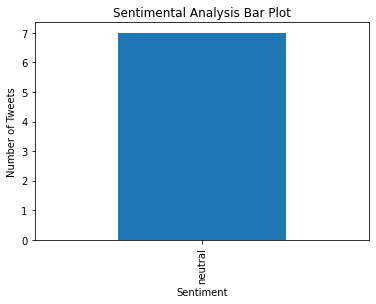

In [205]:
#Visualization
df2['Vader_Senti'].value_counts().plot(kind='bar')
plt.title('Sentimental Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()